# Exercices with the Newsgroups Dataset

## Getting the newsgroups data

The project is about the 20 newsgroups dataset. It's composed of text taken from newsgroup articles and it was originally collected by Ken Lang. The data contains approximately 20,000 documents across 20 online newsgroups. A newsgroup is a place on the internet where people can ask and answer questions about a certain topic. The data is already cleaned to a certain degree and already split into training and testing sets. The cutoff point is at a certain date.

The original data: [source](http://qwone.com/~jason/20Newsgroups/)

The 20 newsgroups:

* comp.graphics
* comp.os.ms-windows.misc
* comp.sys.ibm.pc.hardware
* comp.sys.mac.hardware
* comp.windows.x
* rec.autos
* rec.motorcycles
* rec.sport.baseball
* rec.sport.hockey
* sci.crypt
* sci.electronics
* sci.med
* sci.space
* talk.politics.misc
* talk.politics.guns
* talk.politics.mideast
* talk.religion.misc
* alt.atheism
* soc.religion.christian
* misc.forsale

Some of the newsgroups are closely related or even overlapping, for instance, the five computer related groups (`comp.graphics`, `comp.os.ms-windows.misc`, `comp.sys.ibm.pc.hardware`, `comp.sys.mac.hardware`, `comp.windows.x`), while some are not closely related to each other, such as `soc.religion.christian` and `rec.sport.hockey`.

This dataset can be used for supervised learning (each news entry is labeled) or unsupervised learning (topic modeling to discover abstract topics beyond the original 20 labels).

The scikit-learn library provides a utility function that loads the dataset.

In [1]:
from sklearn.datasets import fetch_20newsgroups

# load data
# a subset of categories can be specified if necessary, and there are other arguments
newsgroups = fetch_20newsgroups()

# Exploring the newsgroups data

In [4]:
# the loaded object is a dictionary
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# show labels for the newsgroups
newsgroups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# The target key corresponds to a newsgroup, but is encoded as an integer
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

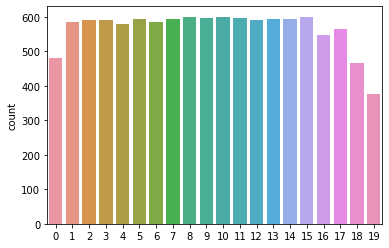

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the distribution of the classes
sns.countplot(x=newsgroups.target)
plt.show()

In [9]:
# have a look at the first document
print(newsgroups.data[0])

11314


In [10]:
print(newsgroups.target[0])
print(newsgroups.target_names[newsgroups.target[0]])

7
rec.autos


# Bag of Words

Without preprocessing

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Only 500 top (most frequent) tokens will be considered
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(newsgroups.data)
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [12]:
# show the features
print(count_vector.get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

The first trial doesn't look good. The most popular tokens are numbers or letters with numbers, which do not convey important information. There are also a lot of words that have no actual meaning, such as 'you', 'the', etc. Some words contain identical information, for example 'tell' and 'told'.

# Text preprocessing

In [13]:
# retain letter-only words (suppresion des chiffre)
data_cleaned = []
for doc in newsgroups.data:
    doc_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
    data_cleaned.append(doc_cleaned)

In [14]:
# remove known names
from nltk.corpus import names
all_names = set(names.words())
# print(all_names)

# standard nltk lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(data):
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        # lemmatize word and retain all letter-only words except names
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
        data_cleaned.append(doc_cleaned)

    return data_cleaned

In [15]:
# CountVectorizer has a special parameter for dropping stopwords for a given language
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
data_cleaned = clean_text(newsgroups.data)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
print(count_vector_sw.get_feature_names_out())

# CountVectorizer has an argument `ngram_range` to specify the lower and upper boundary of the range 
# of n-values for different word n-grams or char n-grams to be extracted.
# ngram_range=(1, 1) - only unigrams,
# ngram_range=(1, 2) - unigrams and bigrams,
# ngram_range=(3, 3) - only bigrams.

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

# Visualizing the newsgroups

In [16]:
from sklearn.manifold import TSNE

categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_3 = fetch_20newsgroups(categories=categories_3)

data_cleaned_3 = clean_text(newsgroups_3.data)
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned_3)
# print(count_vector_sw.get_feature_names_out())

tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500, init='pca')
data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

c:\Users\e.ishkina\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


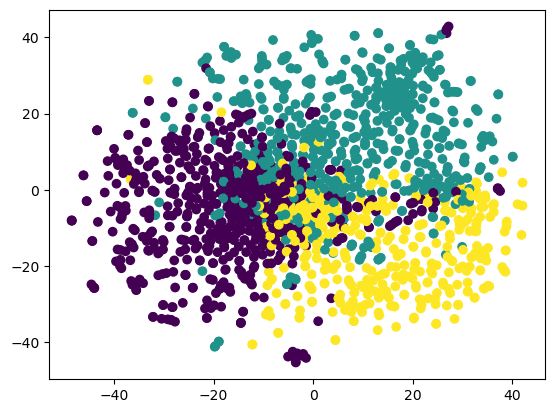

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=newsgroups_3.target)
plt.show()

c:\Users\e.ishkina\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


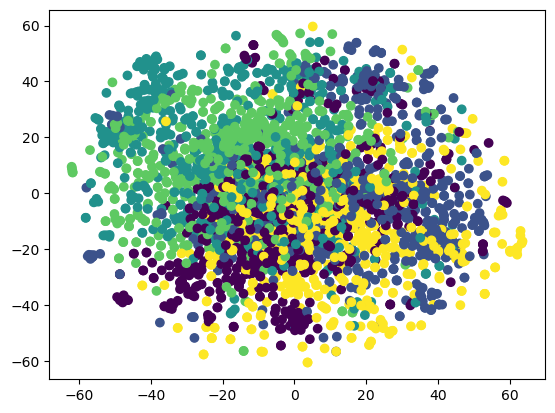

In [18]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
newsgroups_5 = fetch_20newsgroups(categories=categories_5)

data_cleaned_5 = clean_text(newsgroups_5.data)
data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned_5)

tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500, init='pca')
data_tsne = tsne_model.fit_transform(data_cleaned_count_5.toarray())

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=newsgroups_5.target)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

X_train, y_train = fetch_20newsgroups(categories=categories_3, subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(categories=categories_3, subset='test', return_X_y=True)

X_train_cleaned = clean_text(X_train)
X_train_bow = count_vector_sw.fit_transform(X_train_cleaned)

clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train_bow, y_train)

X_test_cleaned = clean_text(X_test)
X_test_bow = count_vector_sw.transform(X_test_cleaned)

y_pred = clf.predict(X_test_bow)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       388
           1       0.86      0.87      0.87       387
           2       0.87      0.85      0.86       259

    accuracy                           0.87      1034
   macro avg       0.87      0.87      0.87      1034
weighted avg       0.87      0.87      0.87      1034



In [20]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']

X_train, y_train = fetch_20newsgroups(categories=categories_5, subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(categories=categories_5, subset='test', return_X_y=True)

X_train_cleaned = clean_text(X_train)
X_train_bow = count_vector_sw.fit_transform(X_train_cleaned)

clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train_bow, y_train)

X_test_cleaned = clean_text(X_test)
X_test_bow = count_vector_sw.transform(X_test_cleaned)

y_pred = clf.predict(X_test_bow)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       403
           1       0.61      0.61      0.61       394
           2       0.68      0.61      0.64       437
           3       0.70      0.72      0.71       371
           4       0.63      0.71      0.67       350

    accuracy                           0.66      1955
   macro avg       0.66      0.66      0.66      1955
weighted avg       0.66      0.66      0.65      1955



# Exercises

1. Do you think all of the top 500-word tokens contain valuable information? If not, can you impose another list of stop words?
2. Does it make sense to use stemming instead of lemmatization to process the newsgroups data?
3. Try to increase `max_features` in `CountVectorizer` from `500` to `5000` and see how the t-SNE visualization will be affected.
4. Try visualizing documents from six topics (similar or dissimilar) and tweak parameters so that the formed clusters look reasonable.

# Clustering newsgroups data

In [21]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

data_cleaned = clean_text(newsgroups.data)
labels = newsgroups.target
label_names = newsgroups.target_names

# The vectorizer does not limit the number of features (tokens), but the minimum (2) and maximum (50%) document frequency 
count_vector = CountVectorizer(stop_words="english", max_features=None, max_df=0.5, min_df=2)
data_bow = count_vector.fit_transform(data_cleaned)

In [22]:
from sklearn.cluster import KMeans

k = len(categories)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_bow)

KMeans(n_clusters=4, random_state=42)

In [23]:
from collections import Counter

clusters = kmeans.labels_
print(Counter(clusters))

Counter({3: 3360, 0: 17, 1: 7, 2: 3})


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)

data_tfidf = tfidf_vector.fit_transform(data_cleaned)
kmeans.fit(data_tfidf)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({3: 1480, 0: 782, 1: 615, 2: 510})


In [25]:
import numpy as np

cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}
terms = np.array(tfidf_vector.get_feature_names())
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print(f'cluster_{cluster}: {len(index_list)} samples')
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print(f'{label_names[label_index]}: {count} samples')
    print(f'Top 10 terms: {terms[centroids[cluster].argsort()[-10:][::-1]]}')
    print()

cluster_0: 782 samples
comp.graphics: 733 samples
sci.space: 44 samples
alt.atheism: 4 samples
talk.religion.misc: 1 samples
Top 10 terms: ['image' 'graphic' 'file' 'program' 'university' 'looking' 'thanks' 'know'
 'need' 'computer']

cluster_1: 615 samples
alt.atheism: 365 samples
talk.religion.misc: 247 samples
comp.graphics: 2 samples
sci.space: 1 samples
Top 10 terms: ['god' 'christian' 'say' 'wa' 'people' 'jesus' 'morality' 'think' 'moral'
 'article']

cluster_2: 510 samples
sci.space: 508 samples
alt.atheism: 1 samples
comp.graphics: 1 samples
Top 10 terms: ['space' 'shuttle' 'launch' 'wa' 'mission' 'nasa' 'hst' 'moon' 'zoology'
 'just']

cluster_3: 1480 samples
sci.space: 434 samples
alt.atheism: 429 samples
talk.religion.misc: 380 samples
comp.graphics: 237 samples
Top 10 terms: ['wa' 'article' 'university' 'just' 'ha' 'like' 'know' 'think' 'people'
 'new']



c:\Users\e.ishkina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
# ! pip install wordcloud

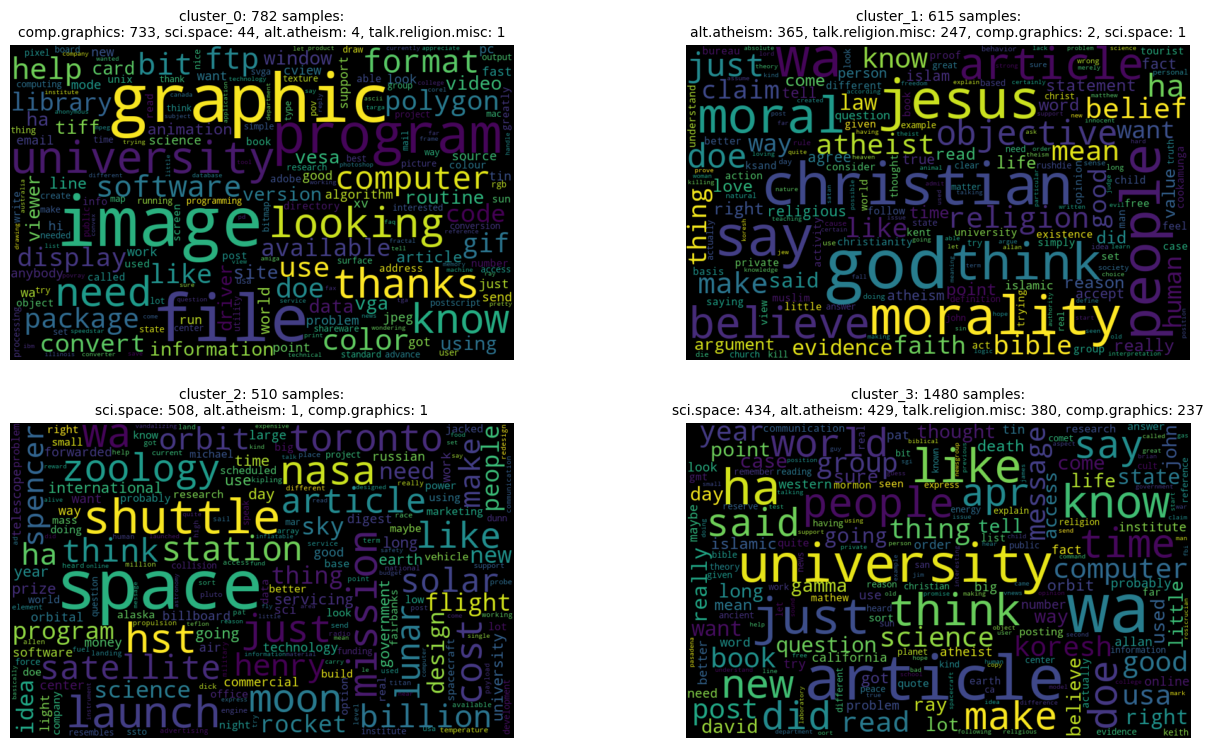

In [27]:
from wordcloud import WordCloud
import math

n_cols = 2
fig, axs = plt.subplots(math.ceil(k/n_cols), n_cols, figsize=(16,9))
for i in range(k):

    cluster_terms_freq = dict(zip(terms, centroids[i]))
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cluster_terms_freq)

    plt_i = math.floor(i/n_cols)
    plt_j = i - plt_i*n_cols

    axs[plt_i, plt_j].imshow(wordcloud, interpolation="bilinear")
    axs[plt_i, plt_j].axis('off')

    counter = sorted(Counter(cluster_label[i]).items(), key=lambda x: x[1], reverse=True)
    title = \
        f'cluster_{i}: {len(cluster_label[i])} samples:\n' + \
        ', '.join([f'{label_names[label_index]}: {count}' for label_index, count in counter])

    axs[plt_i, plt_j].set_title(title, fontsize=10)

plt.show()

Observations:
* `cluster_0` is more about computer graphics and related terms, such as `format`, `program`, `file`, `graphic`, and `image`
* `cluster_1` brings together two overlapping topics, atheism and religion, with key terms including `moral`, `morality`, `jesus`, `christian`, and `god`
* `cluster_2` is obviously about space and includes almost only `sci.space` samples and related terms such as `moon`, `nasa`, `launch`, `shuttle`, and `space`
* `cluster_3` is more of a generic topic, it includes a lot of samples of all the four topics


# Discovering underlying topics in newsgroups

In [44]:
num_topics = 20

## Topic modeling using NMF

Non-negative matrix factorization

In [28]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=num_topics, random_state=42)

In [29]:
data = count_vector.fit_transform(data_cleaned)
nmf.fit(data)
# nmf.components_

NMF(n_components=20, random_state=42)

In [42]:
terms = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    topics_str = " ".join([terms[i] for i in topic.argsort()[-10:][::-1]])
    print(f"Topic {topic_idx}: {topics_str}")

Topic 0: jpeg image file gif version color free program quality available
Topic 1: think people just like say doe know make article ha
Topic 2: image tool data processing ha software user analysis available include
Topic 3: solar spacecraft moon planet wa earth ha surface kilometer atmosphere
Topic 4: launch satellite space commercial ha market service venture technology communication
Topic 5: god lord mcconkie unto shall mormon father jesus wa verse
Topic 6: graphic send ray file mail image object server message format
Topic 7: atheist god religious belief religion believe atheism doe people christian
Topic 8: data image available ftp package ha program grass graphic file
Topic 9: physical physicist theory universe book larson star unified material speed
Topic 10: space nasa shuttle mission center astronaut group program station planetary
Topic 11: space telescope national satellite observatory acronym center astronomical high infrared
Topic 12: fallacy argument conclusion premise ad 

There are a number of interesting topics, for instance, 
* computer graphics-related topics, such as 0, 2, 6, and 8, 
* space-related ones, such as 3, 4, and 9, and 
* religion-related ones, such as 5, 7, and 13. 

There are also two topics, 1 and 12, that are hard to interpret.

## Topic modeling using LDA (sklearn)

LDA = Latent Dirichlet Allocation

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='batch', random_state=42)
data = count_vector.fit_transform(data_cleaned)
lda.fit(data)
# lda.components_

LatentDirichletAllocation(n_components=20, random_state=42)

In [43]:
terms = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    topics_str = " ".join([terms[i] for i in topic.argsort()[-10:][::-1]])
    print(f"Topic {topic_idx}: {topics_str}")

Topic 0: god wa christian people jesus say believe ha doe atheist
Topic 1: radius article hacker wa ha know want adobe just moment
Topic 2: hst graphic data computer research available wa ha point center
Topic 3: article say think wa people doe thing just argument objective
Topic 4: wa just know want life good ha brian like time
Topic 5: like wa article just university need know think graphic computer
Topic 6: image file jpeg gif version use doe color program free
Topic 7: wa article like just ha university know did ray gamma
Topic 8: image bit program color software data using processing ha tool
Topic 9: wa article university just woman think ha know men apr
Topic 10: wa spacecraft data command jet mar april mission propulsion jpl
Topic 11: station space article option point redesign university ha like russian
Topic 12: wa theory physical universe physicist material star book van ha
Topic 13: islamic islam muslim rushdie article wa law book doe bank
Topic 14: wa know article universit

There are a number of interesting topics that we just mined, for instance, 
* computer graphics-related topics, such as 2, 5, 6, 8, and 19, 
* space-related ones, such as 10, 11, 12, and 15, and 
* religion-related ones, such as 0 and 13. 

There are also topics involving noise, for example, 9 and 16, which may require some imagination to interpret.

In [37]:
# ! pip install pyldavis

In [41]:
import pyLDAvis
import pyLDAvis.sklearn

vis_data = pyLDAvis.sklearn.prepare(lda, data, count_vector)
pyLDAvis.display(vis_data)

c:\Users\e.ishkina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\e.ishkina\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


## Topic modeling using LDA (GenSim)

In [47]:
from gensim.parsing.preprocessing import remove_stopwords

data_cleaned_gensim = [remove_stopwords(doc) for doc in data_cleaned]

In [57]:
from gensim.corpora.dictionary import Dictionary

tokenized_docs = [doc.split() for doc in data_cleaned_gensim]
dictionary = Dictionary(tokenized_docs)
corpus_bow = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [50]:
from gensim.models.ldamodel import LdaModel

lda_gensim_bow = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=num_topics, passes=10)

In [51]:
import pyLDAvis.gensim

vis_data = pyLDAvis.gensim.prepare(lda_gensim_bow, corpus_bow, dictionary)
pyLDAvis.display(vis_data)

c:\Users\e.ishkina\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [53]:
lda_gensim_bow_5 = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=5, passes=10)
vis_data_5 = pyLDAvis.gensim.prepare(lda_gensim_bow_5, corpus_bow, dictionary)
pyLDAvis.display(vis_data_5)

c:\Users\e.ishkina\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


## Latent Semantic Analysis

In [61]:
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.lsimodel import LsiModel

tfidf_gensim = TfidfModel(corpus_bow)
corpus_tfidf = tfidf_gensim[corpus_bow]
# initialize an LSI transformation: https://en.wikipedia.org/wiki/Latent_semantic_analysis#Latent_semantic_indexing
lsi_model = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)  
# create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
corpus_lsi = lsi_model[corpus_tfidf]

c:\Users\e.ishkina\Anaconda3\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [63]:
lsi_model.print_topics(10)

[(0,
  '0.163*"wa" + 0.158*"god" + 0.127*"people" + 0.127*"space" + 0.117*"think" + 0.102*"ha" + 0.102*"like" + 0.100*"know" + 0.099*"christian" + 0.097*"doe"'),
 (1,
  '-0.257*"god" + 0.242*"image" + 0.200*"space" + 0.173*"file" + 0.156*"graphic" + -0.149*"jesus" + -0.143*"christian" + 0.133*"program" + -0.128*"morality" + -0.122*"moral"'),
 (2,
  '-0.318*"space" + 0.238*"image" + 0.225*"file" + -0.195*"hst" + 0.187*"graphic" + -0.182*"shuttle" + -0.145*"mission" + -0.142*"launch" + -0.128*"zoology" + 0.125*"format"'),
 (3,
  '-0.419*"objective" + -0.390*"morality" + -0.324*"moral" + 0.237*"god" + 0.214*"jesus" + -0.144*"value" + -0.112*"allan" + -0.096*"animal" + -0.093*"keith" + 0.089*"bible"'),
 (4,
  '-0.327*"zoology" + -0.317*"toronto" + 0.301*"space" + -0.284*"hst" + -0.202*"u" + -0.178*"spencer" + -0.174*"henry" + -0.152*"god" + -0.130*"mission" + -0.119*"dunn"'),
 (5,
  '0.305*"hst" + 0.237*"god" + 0.213*"shuttle" + -0.209*"zoology" + -0.206*"toronto" + 0.176*"image" + -0.148*